#**Introduction**



Congratulations on reaching this point of the course! 

As a capstone project, you will perform a complete differential expression analysis pipeline integrating key concepts from all the modules covered thus far. This will provide an opportunity to combine your fundamental UNIX, Python, R, and computational biology skills to produce interpretable results. 

The transcriptomic data you will use for this project originates from the work of Arunachalam et al. and is described in their journal article: [Systems biological assessment of immunity to mild versus severe COVID-19 infection in humans](https://www.science.org/doi/10.1126/science.abc6261). Their study sought to address the COVID-19 pandemic by investigating connections between the human immune response to SARS-CoV-2 and severity of infection. To achieve this, they conducted RNA-Seq on bulk peripheral blood mononuclear cells (PBMCs) of both healthy and COVID-19 infected individuals. It is these two cohorts that will serve as the subjects of your project.

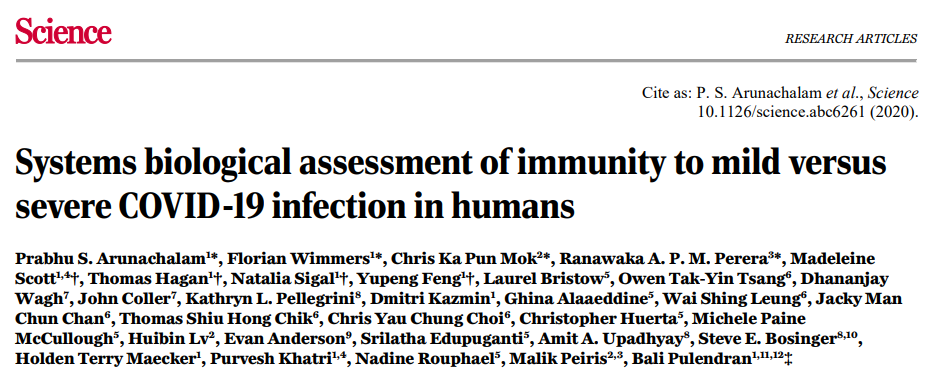

#**Instructions**

In a copy of this Google Colab notebook, follow the steps outlined below to fill in all `code-blocks` and answer the questions denoted by <font color='red'>red text</font>. You may freely reference any of the code provided to you in the previous lab assignments. 

Once complete, submit your copied notebook to your individual Google Drive folder.

You will be graded based on two categories: your responses to the questions, and whether your Colab notebook can produce a GitHub repository similar to the example here: [CynthiaFlaire/USMF_Curs-Bioinformatica-2022_FinalProjectExample](https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_FinalProjectExample). Specifically, your repo should, for the most part, mirror its file structure and contents using your own data.

And with that, Good Luck! 


#**Part 1: Preparing the data**

Your first task is to download the dataset we have prepared for you. Your data is stored in a directory labeled with your name and can be accessed from the following repository: [CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets](https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets). 

Upon opening your designated folder, you will find two subfolders named 'COVID' and 'Healthy', each containing three compressed FASTQ files from the respective cohort.

**Question 1.** To download a specific file from a typical file-hosting website directly into a notebook, which of the following is strictly necessary?

* A) a webpage link
* B) a direct link
* C) either a webpage or direct link
* D) a repository link

<font color='red'>B) a direct link</font> 

On GitHub, you can obtain this kind of link by navigating to your file of interest and right-clicking on the Download button shown in the screenshot below. Then, by clicking `Copy link address`, the link will be copied to your clipboard and can be pasted as text.

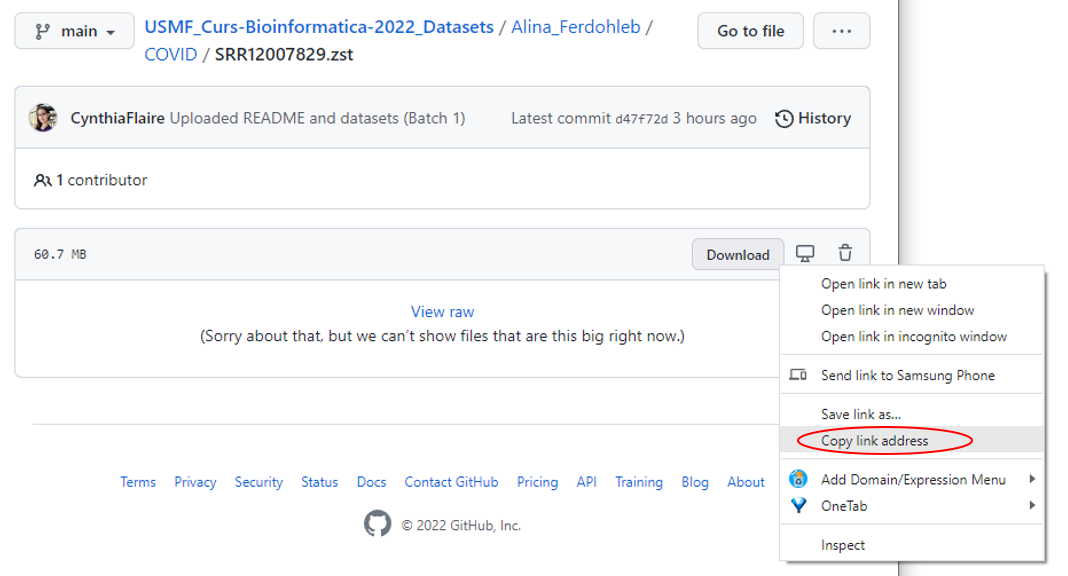

Peform this six times to get the links for all six of your samples. You may store them in the text box below for your convenience:

_COVID_


----

_Healthy_

Next, create a directory to store your data called `data` in the code-block below:

In [ ]:
%%bash
mkdir data

Next, download your files into the `data` directory using one or more code-blocks below:

In [ ]:
%%bash
#COVID
wget -nv -O data/SRR12007829.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/COVID/SRR12007829.fastq.zst' &>/dev/null
wget -nv -O data/SRR12007837.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/COVID/SRR12007837.fastq.zst' &>/dev/null
wget -nv -O data/SRR12007843.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/COVID/SRR12007843.fastq.zst' &>/dev/null

#Healthy
wget -nv -O data/SRR12007855.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/Healthy/SRR12007855.fastq.zst' &>/dev/null
wget -nv -O data/SRR12007857.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/Healthy/SRR12007857.fastq.zst' &>/dev/null
wget -nv -O data/SRR12007859.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Alina_Ferdohleb/Healthy/SRR12007859.fastq.zst' &>/dev/null

Notice that these files have a secondary extension, `.fastq.zst`, similar to the `.fastq.gz`/`.fq.gz` extension you have seen before. Similar to `gz`, the `.zst` extension signifies that the file was compressed with a command-line program, in this case, `zstd`. The key difference between them is that `zstd` peforms better by several metrics (ex. compression speed & compression ratio). 

To decompress your `.fastq.zst` samples for further use, you need to install `zstd`

**Question 2.** `zstd` is a command-line program. As such, which of the following methods should you use to download it?

* A) Python's `import` keyword
* B) Bioconductor's `install()` function
* C) CRAN's `install.packages()` function
* D) `conda` or `mamba`

<font color='red'>D) `conda` or `mamba`</font> 

**Question 3.** Does the method you chose support custom environments? Additionally, what are environments used for?

<font color='red'>Yes, `conda` and `mamba` support custom environments. Environments are used to compartmentalize software installation, enabling the separation of conflicting dependencies and providing a record of software verions.</font> 

**Question 4.** After setting up two environments: one named `envOne` with `bwa` installed, and another named `envTwo` with `bowtie2` installed, what type of message will the code below output? Explain why this occurs.

```
%%bash
source activate envOne
bowtie2 --help
```

<font color='red'>The code will output an error because bowtie2 is not installed within the environment named envOne. </font> 

Now, use your chosen method to download `zstd`. Do so using one or more code-blocks below:

In [ ]:
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null
rm Miniconda3-py39_4.10.3-Linux-x86_64.sh

In [ ]:
%%bash
conda install -c conda-forge mamba --yes &>/dev/null

In [ ]:
%%bash
mamba create --name final --yes &>/dev/null

In [ ]:
%%bash
source activate final
mamba install -c conda-forge zstd --yes

Transaction

  Prefix: /usr/local/envs/final

  Updating specs:

   - zstd


  Package          Version  Build          Channel                    Size
────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex      0.1  conda_forge    conda-forge/linux-64     Cached
  + _openmp_mutex      4.5  1_gnu          conda-forge/linux-64     Cached
  + libgcc-ng       11.2.0  h1d223b6_15    conda-forge/linux-64     Cached
  + libgomp         11.2.0  h1d223b6_15    conda-forge/linux-64     Cached
  + libstdcxx-ng    11.2.0  he4da1e4_15    conda-forge/linux-64     Cached
  + libzlib         1.2.11  h166bdaf_1014  conda-forge/linux-64       61kB
  + lz4-c            1.9.3  h9c3ff4c_1     conda-forge/linux-64     Cached
  + xz               5.2.5  h516909a_1     conda-forge/linux-64      352kB
  + zstd             1.5.2  ha95c52a_0     conda-forge/linux-64      469kB

  Summ

warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header


Now that `zstd` is installed, call it below to decompress each of your `.fastq.gz` files. This will take the `-d`/`--decompress` flag, and the file to decompress as an argument.

In [ ]:
%%bash
source activate final
for file in data/*.fastq.zst; do
  zstd -d $file
done

The next step is to perform quality control on your FASTQ files. This will remove bad reads that could potentially skew the results you produce. A handy all-in-one program to perform quality control is `fastp`, another command-line program. Install `fastp` in one or more code-blocks below. 

( _Hint:_ If you experience trouble installing `fastp`, try using a new environment. )

In [ ]:
%%bash
mamba create --name final2 --yes &>/dev/null

In [ ]:
%%bash
source activate final2
mamba install -c bioconda fastp --yes

Transaction

  Prefix: /usr/local/envs/final2

  Updating specs:

   - fastp


  Package          Version  Build        Channel                  Size
────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex      0.1  main         pkgs/main/linux-64     Cached
  + _openmp_mutex      4.5  1_gnu        pkgs/main/linux-64       22kB
  + fastp           0.20.1  h2e03b76_1   bioconda/linux-64         4MB
  + libgcc-ng        9.3.0  h5101ec6_17  pkgs/main/linux-64     Cached
  + libgomp          9.3.0  h5101ec6_17  pkgs/main/linux-64     Cached
  + libstdcxx-ng     9.3.0  hd4cf53a_17  pkgs/main/linux-64     Cached
  + zlib            1.2.11  h7f8727e_4   pkgs/main/linux-64      110kB

  Summary:

  Install: 7 packages

  Total download: 4MB

────────────────────────────────────────────────────────────────────────


                  __    __    __    __
                 /  \ 

warning  libmamba Extracted package cache '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu' has invalid size
warning  libmamba Extracted package cache '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu' has invalid SHA-256 checksum
warning  libmamba Package tarball '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu.tar.bz2' is invalid


Now you are ready to pre-process your FASTQ files for quality control. Start by creating a directory for the filtered files called `filtered` in the code-block below:

In [ ]:
%%bash
mkdir filtered

Then, call `fastp` with the `-i` (input) and `-o` (output) parameters for each of your FASTQ files.

The argument to `-i` should be an input file. The argument to `-o` should be a chosen name and/or path for an output file. For your project, store the output files in the `filtered` directory.

Additionally, add the code `--json /dev/null --html /dev/null` to the end of the `fastp` command to suppress quality report output. We will not need them for this project.

In [ ]:
%%bash
source activate final2
for file in data/*.fastq; do
    FILENAME="$(basename -- $file)"
    ID="${FILENAME%%.*}"
    fastp -i $file -o filtered/$ID.fastq --json /dev/null --html /dev/null
done

Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 2944847
total bases: 294393210
Q20 bases: 294025093(99.875%)
Q30 bases: 294025093(99.875%)

Read1 after filtering:
total reads: 2944847
total bases: 294393210
Q20 bases: 294025093(99.875%)
Q30 bases: 294025093(99.875%)

Filtering result:
reads passed filter: 2944847
reads failed due to low quality: 0
reads failed due to too many N: 0
reads failed due to too short: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 15.2255%

JSON report: /dev/null
HTML report: /dev/null

fastp -i data/SRR12007829.fastq -o filtered/SRR12007829.fastq --json /dev/null --html /dev/null 
fastp v0.20.1, time used: 19 seconds
Detecting adapter sequence for read1...
GAGGAGGGCCCGTTGGGAGGCCCAGCGGGCAGGAGGAACGGCTACCGAGGCTCCAGCTTA

Read1 before filtering:
total reads: 3962840
total bases: 396166255
Q20 bases: 395669778(99.8747%)
Q30 

You may notice from the output messages that no reads were filtered out. This is due to the nature of the data we have prepared for you. In most cases, however, bad reads will be found and filtered out during this step. 

Finally, to conclude this section, remove the intermediate unfiltered, decompressed `.fastq` files that remain in the `data` directory:

In [ ]:
%%bash
for file in data/*.fastq; do
    rm $file
done

#**Part 2: Transcript Quantification**

Your RNA-Seq data is now fully prepared. However, an additional file will be  needed to process it into transcript counts.

**Question 5.** What type of additional file do you need? Why do you need it?

<font color='red'>A transcriptome file is needed, specifically one in FASTA format.</font> 

With your answer in mind, locate the additional file on the Ensembl website for the latest Human genome assembly (GRCh38.p13) via this link:
https://ensembl.org/Homo_sapiens/Info/Index

The exact file you need is called `Homo_sapiens.GRCh38.cdna.all.fa.gz` as shown below.

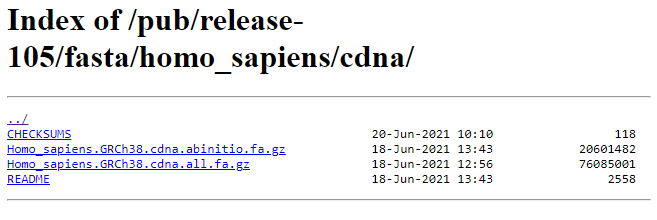

Once found, use your UNIX knowledge to download the file to this notebook via the code-block below.

( _Hint._  If you are unsure how to proceed, your approach to Question 1 and identify the equivalent to the Download button on the  webpage screenshotted above. )

In [ ]:
%%bash
wget -nv -O Homo_sapiens.GRCh38.cdna.all.fa.gz 'http://ftp.ensembl.org/pub/release-105/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz' &>/dev/null

You now have all the files you need to quantify transcript expression.

**Question 6.** What method will you use to quantify RNA transcripts? What advantages does your choice present?

* A) Splice-aware alignment to a genome
* B) Alignment to a transcriptome
* C) Quasi-mapping

<font color='red'>C) Quasi-mapping</font> 

With your choice made, start by installing the necessary program/s to perform the above method in the code-block below:

In [ ]:
%%bash
source activate final2
mamba install -c bioconda salmon=0.12.0 --yes

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
Transaction

  Prefix: /usr/local/envs/final2

  Updating specs:

   - salmon=0.12.0


  Package      Version  Build        Channel                  Size
────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────

  + bzip2        1.0.8  h7b6447c_0   pkgs/main/linux-64       80kB
  + icu           58.2  he6710b0_3   pkgs/main/linux-64       11MB
  + jemalloc     5.2.1  h2531618_5   pkgs/main/linux-64        1MB
  + libboost    1.73.0  h3ff78a5_11  pkgs/main/linux-64       15MB
  + lz4-c        1.9.3  h295c915_1   pkgs/main/linux-64      189kB
  + salmon      0.12.0  h86b0361_1   bioconda/linux-64         3MB
  + tbb       2021.5.0  hd09550d_0   pkgs/main/linux-64      161kB
  + xz           5.2.5  h7b6447c_0   pkgs/main/linux-64     Cached
  + zstd        

Next, consider the procedure and input necessary to produce transcript counts with the program/s you just downloaded. 

**Question 7.** True or False: It is best to align or quasi-map RNA reads directly to a transcriptome, without any additional steps.

* A) True
* B) False

<font color='red'>B) False (The reference transcriptome index should be created prior to quantification.)</font> 

Based on your answer, write the code to quantify RNA transcripts in one or more code-blocks below:

In [ ]:
%%bash
source activate final2
salmon index -t Homo_sapiens.GRCh38.cdna.all.fa.gz -i Homo_sapiens.GRCh38.cdna.all

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon


index ["Homo_sapiens.GRCh38.cdna.all"] did not previously exist  . . . creating it
[2022-04-15 10:53:59.791] [jLog] [info] building index
[2022-04-15 10:53:59.791] [jointLog] [info] [Step 1 of 4] : counting k-mers
[2022-04-15 10:53:59.803] [jointLog] [warning] Entry with header [ENST00000631435.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-15 10:53:59.804] [jointLog] [warning] Entry with header [ENST00000415118.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-15 10:53:59.804] [jointLog] [warning] Entry with header [ENST00000448914.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-15 10:53:59.804] [jointLog] [warning] Entry with header [ENST00000434970.2], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-15 10:53:59.804] [jointLog] [warning] Entry with header [ENST00000632684.1], had length less than the k-mer length of 31 (perhaps

In [ ]:
%%bash
source activate final2
for file in filtered/*.fastq; do
    FILENAME="$(basename -- $file)"
    ID="${FILENAME%%.*}"
    salmon quant -i Homo_sapiens.GRCh38.cdna.all -l A -r $file --validateMappings --quiet -o "quants/$ID"
done

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon


tcmalloc: large alloc 1412759552 bytes == 0x55d76dd16000 @  0x7fac39e38887 0x55d761ba7f57 0x55d761ba828f 0x55d761bb1b15 0x55d761cf6237 0x55d761cf69dc 0x55d761e0a1d5 0x55d761df2eb9 0x55d761b3e94a 0x7fac3923ac87 0x55d761b477b9
tcmalloc: large alloc 1412759552 bytes == 0x56251ff42000 @  0x7ff913d83887 0x562506da3f57 0x562506da428f 0x562506dadb15 0x562506ef2237 0x562506ef29dc 0x5625070061d5 0x562506feeeb9 0x562506d3a94a 0x7ff913185c87 0x562506d437b9


tcmalloc: large alloc 1412759552 bytes == 0x5604e8b90000 @  0x7fbd938f3887 0x5604dc674f57 0x5604dc67528f 0x5604dc67eb15 0x5604dc7c3237 0x5604dc7c39dc 0x5604dc8d71d5 0x5604dc8bfeb9 0x5604dc60b94a 0x7fbd92cf5c87 0x5604dc6147b9
tcmalloc: large alloc 1412759552 bytes == 0x55ff7ee44000 @  0x7fca1f48d887 0x55ff717ecf57 0x55ff717ed28f 0x55ff717f6b15 0x55ff7193b237 0x55ff7193b9dc 0x55ff71a4f1d5 0x55ff71a37eb9 0x55ff7178394a 0x7fca1e88fc87 0x55ff7178c7b9
tcmalloc: large alloc 1412759552 bytes == 0x5618aaef6000 @  0x7fe7b01ee887 0x56189ce46f57 0x56189c

With the transcript abundance files now produced, clean up your workspace by removing the intermediary `filtered` directory in the code-block below:

In [ ]:
%%bash
rm -r filtered/

#**Part 3: Differential Expression Analysis (DEA)**

Now that you have obtained counts of every transcript, you will want to make comparisons between sample groups to identify occurances of differential expression.

To accomplish this, we will use the R packages introduced previously. In one or more code-blocks below, install the necessary R packages for DEA.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

In [ ]:
%%R
BiocManager::install("tximeta", quiet = TRUE, ask = FALSE)
library(tximeta)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)



In [ ]:
%%R
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)
library(DESeq2)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: 'BiocGenerics'


R[write to console]: The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapp

Once installation is complete, use one or more code-blocks below to store your sample metadata in an R-accessible `data.frame`. With this, the R packages you installed will be able to access your transcript count data and distinguish whether each sample came from a COVID-infected or healthy individual. 

In [ ]:
%%R
sample_names <-c("SRR12007829","SRR12007837","SRR12007843", "SRR12007855","SRR12007857","SRR12007859" )
sample_type <- c("COVID","COVID","COVID","Healthy","Healthy","Healthy")
files <- paste("/content/quants/", sample_names, "/quant.sf", sep="")
coldata <- data.frame(files, names=sample_names, condition=sample_type, stringsAsFactors=FALSE)
coldata

                                 files       names condition
1 /content/quants/SRR12007829/quant.sf SRR12007829     COVID
2 /content/quants/SRR12007837/quant.sf SRR12007837     COVID
3 /content/quants/SRR12007843/quant.sf SRR12007843     COVID
4 /content/quants/SRR12007855/quant.sf SRR12007855   Healthy
5 /content/quants/SRR12007857/quant.sf SRR12007857   Healthy
6 /content/quants/SRR12007859/quant.sf SRR12007859   Healthy


Then, run the code-blocks below to create a directory for storing the R objects produced during DEA. 

In [ ]:
%%R
biocFileCacheDir <- file.path('R','BiocFileCache')
dir.create(biocFileCacheDir, recursive = TRUE, showWarnings = FALSE)
setTximetaBFC(biocFileCacheDir)

R[write to console]: for group use, set the permissions of this directory to allow group write (g+w)



In [ ]:
%%bash
chmod g+w  ./R/BiocFileCache/
ls -lh ./R

total 4.0K
drwxrwxr-x 2 root root 4.0K Apr 15 11:35 BiocFileCache


Next, the following steps will facilitate the conversion of transcript-level counts to gene-level counts and later, the annotation of gene accession IDs with their gene nomenclature. 

**Question 8.** What is the difference between a transcript and a gene? Why is it often preferable to convert from transcript-level counts to gene-level counts for DEA?

( _Hint._  Consider alternative splicing and the macromolecules involved. )

<font color='red'>A gene is a genomic (DNA) region while a transcript is a transcription product generated from such regions (RNA). For DEA, genes are often more biologically informative than transcripts because they are unique: a gene can be spliced into different RNA transcripts, however, each transcript will only correspond to a single gene. </font> 

To perform this conversion, information mapping transcripts to their known gene annotations is necessary. Such information is often stored within GFF/GTF format files. The details of this format can be found here: 
[GFF/GTF File Format - Definition and supported options](http://ensembl.org/info/website/upload/gff.html)


Like the FASTA transcriptome you used in the previous section, gene annotation files (GTF/GFF) may also be located on the Ensembl website. In the code-block below, locate and download the gene annotation file for the latest Ensembl release of the GRCh38.p13 human assembly. 


The file you need to locate is called `Homo_sapiens.GRCh38.105.gtf.gz` as shown below. 






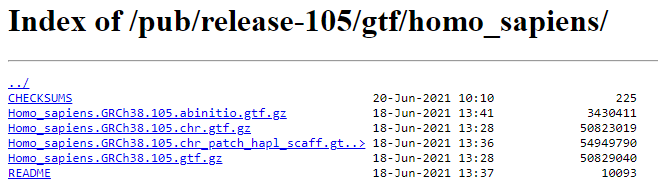

In [ ]:
%%bash
wget -nv -O Homo_sapiens.GRCh38.105.gtf.gz 'http://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/Homo_sapiens.GRCh38.105.gtf.gz' &>/dev/null

Now that the annotation file has been added to the notebook environment, you will need to link it to the FASTA transcriptome and its Salmon index to create a "linked transcriptome" as defined within the Tximeta vignette. 

To do so, fill in the ◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼ within the code-blocks below then run them to obtain genes-level count data using the "linked transcriptome" and sample metadata contained within `coldata`. 

In [ ]:
%%R
fastaFile <- 'Homo_sapiens.GRCh38.cdna.all.fa.gz' 
gtfFile <- 'Homo_sapiens.GRCh38.105.gtf.gz'
makeLinkedTxome(indexDir='Homo_sapiens.GRCh38.cdna.all',
                source='Ensembl',
                organism='Homo sapiens',
                release='105',
                genome='GRCh38.p13',
                fasta=fastaFile,
                gtf=gtfFile)

transcriptSummarizedExp <- tximeta(coldata, type='salmon', txOut=TRUE, useHub=FALSE)

R[write to console]: NOTE: linkedTxome with source='Ensembl', ensembldb will be used to parse GTF.
this may produce errors if the GTF is not from Ensembl, or has been modified.
set useHub=FALSE in tximeta to avoid download of reference txome from AnnotationHub.
alternatively use a different string for source argument

R[write to console]: writing linkedTxome to Homo_sapiens.GRCh38.cdna.all.json

R[write to console]: linkedTxome is same as already in bfc

R[write to console]: importing quantifications

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: found matching linked transcriptome:
[ Ensembl - Homo sapiens - release 105 ]

R[write to console]: loading existing EnsDb created: 2022-04-15 11:34:02

R[write to console]: loading existing transcript ranges created: 2022-04-15 11:35:14



In [ ]:
%%R
geneSummarizedExp <- summarizeToGene(transcriptSummarizedExp)

R[write to console]: loading existing EnsDb created: 2022-04-15 11:34:02

R[write to console]: obtaining transcript-to-gene mapping from database

R[write to console]: loading existing gene ranges created: 2022-04-15 11:35:21

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length



The output of these two code-blocks is an R SummarizedExperiment object storing gene-level abundances. With this, you can now run count normalization and statistical tests to discover differentally expressed genes. 

**Question 9.** Before comparing RNA-Seq gene count data, it is necessary to normalize those counts. In your own words, describe what the purpose of this is.




( _Hint._  Refer to the Module 5 "Basics of RNA-Seq technology and bioinformatics tools" slides if you are unsure. )

<font color='red'>Normalization corrects for differences in sequencing depth and RNA composision between samples.</font> 

For the reason you just described, run the normalization and statisical test steps of DEA using one or more code-blocks below. 

In [ ]:
%%R
dds <- DESeqDataSet(geneSummarizedExp, design = ~ condition)

R[write to console]: using counts and average transcript lengths from tximeta



In [ ]:
%%R
dds <- DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



The output of these steps is another special R object. This object contains the normalized abundance of all genes contained within the FASTA transcriptome that were successfully annotated. As one might expect, it typical for only a portion of these genes to show any expression. To assess this difference in your own data, run the two code-blocks below.

In [ ]:
%%R
nrow(dds)

[1] 34452


In [ ]:
%%R
nrow(dds[ rowSums(counts(dds)) > 1, ])

[1] 19683


**Question 10.** In the above code, what does the `nrow()` function do? What does the first output number represent? What does the second output number represent?

<font color='red'>The `nrow()` function counts the number of rows contained in the `dds` object.  The first number represents the total number of annotated genes. The second number is the number of expressed annotated genes. </font> 

Knowing this, use the above two code-blocks to write R code that will filter out the unexpressed genes. This should produce a reduced version of the R object called `ddsTwo`.

In [ ]:
%%R
ddsTwo <- dds[ rowSums(counts(dds)) > 1, ]

Next, fill in each ◼◼◼◼◼ below with the correct `sample_type` label (ex. "Healthy" or "COVID") to extract a results table from the reduced object. The first ◼◼◼◼◼ and second ◼◼◼◼◼ will serve as the numerator and divisor of fold change respectively. 

In [ ]:
%%R
resultsTable <- results(ddsTwo, contrast=c("condition","COVID","Healthy"), tidy=TRUE)
head(resultsTable)

              row    baseMean log2FoldChange     lfcSE        stat    pvalue
1 ENSG00000000003    1.444721    -0.12000630 1.9971045 -0.06009015 0.9520838
2 ENSG00000000419   59.846654    -0.15844232 0.3886771 -0.40764506 0.6835343
3 ENSG00000000457   44.609333    -0.64958279 0.4270623 -1.52104937 0.1282474
4 ENSG00000000460   22.036161     0.01037403 0.6230621  0.01665008 0.9867158
5 ENSG00000000938 1816.423410     0.08147027 0.2034711  0.40040216 0.6888603
6 ENSG00000000971   17.370515    -0.32655459 0.9432545 -0.34619988 0.7291925
       padj
1        NA
2 0.8861162
3 0.4029142
4 0.9942732
5 0.8884015
6 0.9057922


Finally, run the code below to add a new column to the results table containg the official human gene nomenclature for each Ensembl gene accession. 

In [ ]:
%%R
resultsTable <- cbind(resultsTable, gene_name = gsub('-','_',rowData(ddsTwo)$gene_name))
head(resultsTable)

              row    baseMean log2FoldChange     lfcSE        stat    pvalue
1 ENSG00000000003    1.444721    -0.12000630 1.9971045 -0.06009015 0.9520838
2 ENSG00000000419   59.846654    -0.15844232 0.3886771 -0.40764506 0.6835343
3 ENSG00000000457   44.609333    -0.64958279 0.4270623 -1.52104937 0.1282474
4 ENSG00000000460   22.036161     0.01037403 0.6230621  0.01665008 0.9867158
5 ENSG00000000938 1816.423410     0.08147027 0.2034711  0.40040216 0.6888603
6 ENSG00000000971   17.370515    -0.32655459 0.9432545 -0.34619988 0.7291925
       padj gene_name
1        NA    TSPAN6
2 0.8861162      DPM1
3 0.4029142     SCYL3
4 0.9942732  C1orf112
5 0.8884015       FGR
6 0.9057922       CFH


#**Part 4: Data Visualization**

After completing the previous section, you now have an R `data.frame` containing your samples' gene-level expession data combined with gene-name annotations. With this and your `DESeqDataSet` object, you will be able to use what you learned about Data Visualization to organize your processed data and highlight the parts of it relevant to your hypotheses of interest. 

To start, consider the plots you have been introduced to so far in previous Differential Expression Anlysis assignments. These plots include Volcano Plots, Principal Component Analysis (PCA) plots, and Hierarchically Clustered Heatmaps. 

For the first plot, produce a Volcano plot in the one or more code-blocks below. Take note to use the correct p-value column from your results `data.frame`. 

In [ ]:
%%R
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)
library(EnhancedVolcano)

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel



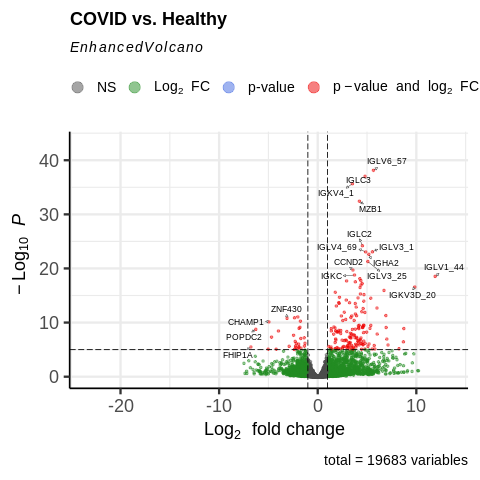

In [ ]:
%%R
#pdf("volcanoPlot.pdf", width = 9, height = 9)
EnhancedVolcano(resultsTable, x = 'log2FoldChange', y = 'padj', pCutoff = 10e-6, FCcutoff = 1,  pointSize = 1, title = 'COVID vs. Healthy', lab = resultsTable$gene_name, labSize = 3.0,  parseLabels = TRUE, drawConnectors = TRUE, widthConnectors = 0.2)

**Question 11.** What aspects of Differential Expression Analysis datasets are often highlighted using Volcano Plots.

<font color='red'>Type your answer here.</font> 

**Question 12.** In your own words, describe what the multiple comparisons problem is and how it relates to Differential Expression Analysis.

<font color='red'>Type your answer here.</font> 

**Question 13.** Below, list the names of two genes that exhibited much higher expression within the COVID cohort. Likewise, do the same for two genes that exhibited much lower expression within the COVID cohort.

<font color='red'>Type your answer here.</font> 

Next, create a PCA plot below using one or more code-blocks. Be sure to apply a variance-stabilizing transformation to the input data prior to plotting. This will reduce the bias towards the most highly expressed genes.


In [ ]:
%%R
dst <- vst(dds, blind=FALSE)
#pdf("PCA.pdf", width = 7, height = 5)
plotPCA(dst, intgroup=c('condition'))

**Question 14.** With your own words, define what dimensionality reduction is and state what the dimensions summarized in your PCA plot are. 

<font color='red'>Type your answer here.</font> 

**Question 15.** Using your own words, what is homoscedasticty and heteroscedasticity? When you apply a varriance-stablizing transcformation, are you correcting your data to be more homoscedastic or heteroscedastic? 

<font color='red'>Type your answer here.</font> 

Both the Volcano Plot and PCA plots are best made within R because of the simplicity of the EnhancedVolcano package, and the PCA plot's reliance on the un-transformed differential expression values stored within the DESeqDataSet object. 

However, sometimes you will want to export data outside of R for processing or visualization with other, non-R software. You can perform this export process on your variance-stabilized data using the code displayed here. This code assumes the name of your transformed data (a DESeqTransform object) is `dst`. 



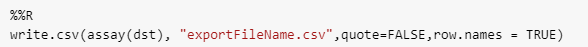

In a code-block below, run this function to produce a `.csv` format file. 

In [ ]:
%%R
rv <- rowVars(assay(dst))
topVarGenes <- assay(dst)[head(order(rv, decreasing=TRUE),100),]
head(topVarGenes)

                SRR12007829 SRR12007837 SRR12007843 SRR12007855 SRR12007857
ENSG00000244734   14.245694    18.89776    7.094483    6.067627   10.001943
ENSG00000188536   12.552505    17.71562    7.243614    6.341074    9.123744
ENSG00000206172   11.377393    15.29189    7.207065    5.883854    7.502722
ENSG00000158578    8.574359    12.14236    5.883854    5.883854    5.883854
ENSG00000211663   10.454447    11.76102   11.826861    7.615717    6.383347
ENSG00000211677   12.855461    13.32325   13.786507    9.681007    8.649300
                SRR12007859
ENSG00000244734   12.141936
ENSG00000188536   11.158623
ENSG00000206172    8.562169
ENSG00000158578    6.501556
ENSG00000211663    6.783294
ENSG00000211677    8.880887


In [ ]:
%%R
transformedResults <- cbind(topVarGenes, gene_name = gsub('-','_',rowData(dst)$gene_name))
head(transformedResults)

                SRR12007829        SRR12007837        SRR12007843       
ENSG00000244734 "14.2456940700026" "18.8977625015655" "7.09448319608971"
ENSG00000188536 "12.5525053965695" "17.7156234527225" "7.24361363383539"
ENSG00000206172 "11.3773931891984" "15.2918918788549" "7.20706495295248"
ENSG00000158578 "8.57435926559169" "12.1423576271227" "5.88385435167046"
ENSG00000211663 "10.4544474657843" "11.7610232353419" "11.8268605490775"
ENSG00000211677 "12.8554612079068" "13.3232489034582" "13.7865074395307"
                SRR12007855        SRR12007857        SRR12007859       
ENSG00000244734 "6.06762653346459" "10.001942810761"  "12.1419358298248"
ENSG00000188536 "6.34107400161147" "9.12374406956276" "11.158623480604" 
ENSG00000206172 "5.88385435167046" "7.50272181450665" "8.56216916236125"
ENSG00000158578 "5.88385435167046" "5.88385435167046" "6.50155613445683"
ENSG00000211663 "7.61571715043175" "6.38334699694152" "6.7832944028497" 
ENSG00000211677 "9.68100692453936" "8.6493000186949

In [ ]:
%%R
write.csv(transformedResults, 'resultsTable.csv', quote = FALSE, row.names = TRUE) 

In past lessons, we introduced the power of the Python library Seaborn for easily producing publication-worthy graphs.  So while we have previously used the R function `heatmap.2()` to create a heiarchially-clustered heatmap, we can now use Seaborn as well.  

With one or more the code-blocks below, plot a Seaborn clustermap from a **subset** of your transformed differential expression data. 

Note that like Seaborn's `heatmap()` function, `clustermap()` also requires maxtrix data (instead of categorical data) as input. 

For more information about Seaborn's `clustermap()` function, you may refer to the documentation here:
https://seaborn.pydata.org/generated/seaborn.clustermap.html



In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('resultsTable.csv')
df.head()

,Unnamed: 0,SRR12007829,SRR12007837,SRR12007843,SRR12007855,SRR12007857,SRR12007859,gene_name
0,ENSG00000244734,14.245694,18.897763,7.094483,6.067627,10.001943,12.141936,TSPAN6
1,ENSG00000188536,12.552505,17.715623,7.243614,6.341074,9.123744,11.158623,TNMD
2,ENSG00000206172,11.377393,15.291892,7.207065,5.883854,7.502722,8.562169,DPM1
3,ENSG00000158578,8.574359,12.142358,5.883854,5.883854,5.883854,6.501556,SCYL3
4,ENSG00000211663,10.454447,11.761023,11.826861,7.615717,6.383347,6.783294,C1orf112


In [ ]:
columnsOfInterest=['SRR12007829','SRR12007837','SRR12007843','SRR12007855','SRR12007857','SRR12007859','gene_name']
df = df[columnsOfInterest]
df.head()

,SRR12007829,SRR12007837,SRR12007843,SRR12007855,SRR12007857,SRR12007859,gene_name
0,14.245694,18.897763,7.094483,6.067627,10.001943,12.141936,TSPAN6
1,12.552505,17.715623,7.243614,6.341074,9.123744,11.158623,TNMD
2,11.377393,15.291892,7.207065,5.883854,7.502722,8.562169,DPM1
3,8.574359,12.142358,5.883854,5.883854,5.883854,6.501556,SCYL3
4,10.454447,11.761023,11.826861,7.615717,6.383347,6.783294,C1orf112


In [ ]:
dfTest = df.set_index('gene_name')
dfTest

,SRR12007829,SRR12007837,SRR12007843,SRR12007855,SRR12007857,SRR12007859
gene_name,,,,,,
TSPAN6,14.245694,18.897763,7.094483,6.067627,10.001943,12.141936
TNMD,12.552505,17.715623,7.243614,6.341074,9.123744,11.158623
DPM1,11.377393,15.291892,7.207065,5.883854,7.502722,8.562169
SCYL3,8.574359,12.142358,5.883854,5.883854,5.883854,6.501556
C1orf112,10.454447,11.761023,11.826861,7.615717,6.383347,6.783294
...,...,...,...,...,...,...
GCFC2,8.469899,7.506939,10.791620,8.700051,8.529167,11.049739
WDR54,9.841975,10.399619,9.694573,7.231119,7.682901,7.409977
CROT,9.084538,8.913739,6.257331,6.292115,6.167436,6.385793


In [ ]:
df.set_index('gene_name')

,SRR12007829,SRR12007837,SRR12007843,SRR12007855,SRR12007857,SRR12007859
gene_name,,,,,,
TSPAN6,14.245694,18.897763,7.094483,6.067627,10.001943,12.141936
TNMD,12.552505,17.715623,7.243614,6.341074,9.123744,11.158623
DPM1,11.377393,15.291892,7.207065,5.883854,7.502722,8.562169
SCYL3,8.574359,12.142358,5.883854,5.883854,5.883854,6.501556
C1orf112,10.454447,11.761023,11.826861,7.615717,6.383347,6.783294
...,...,...,...,...,...,...
GCFC2,8.469899,7.506939,10.791620,8.700051,8.529167,11.049739
WDR54,9.841975,10.399619,9.694573,7.231119,7.682901,7.409977
CROT,9.084538,8.913739,6.257331,6.292115,6.167436,6.385793


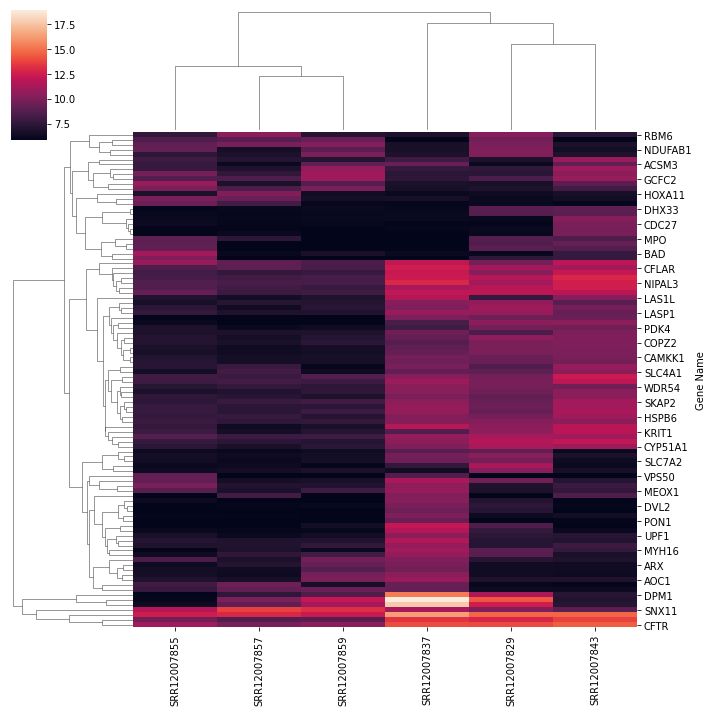

In [ ]:
clustergrid = sns.clustermap(dfTest)
axes = clustergrid.ax_heatmap
axes.set_ylabel("Gene Name")
clustergrid

import matplotlib.pyplot as plt
plt.savefig("clustermap.pdf", bbox_inches='tight')

**Question 16.** True or False? When using the Pandas library to subset a DataFrame, any changes stored under the same DataFrame name will overwrite the previous DataFrame.

<font color='red'>Type your answer here.</font> 

Congratulations! You now have three different graphical representations of your data that you can use to present your data in posters, papers, and more.

#**Part 5: Sharing your data and results**

Now that you have obtained your input data, processed it into tabular form, and produced visualizations from it, you are now ready to share your results with others. So, using what you previously learned about Git and GitHub, create a **private** repo with a structure similar to what was introduced at the beginning of the course.

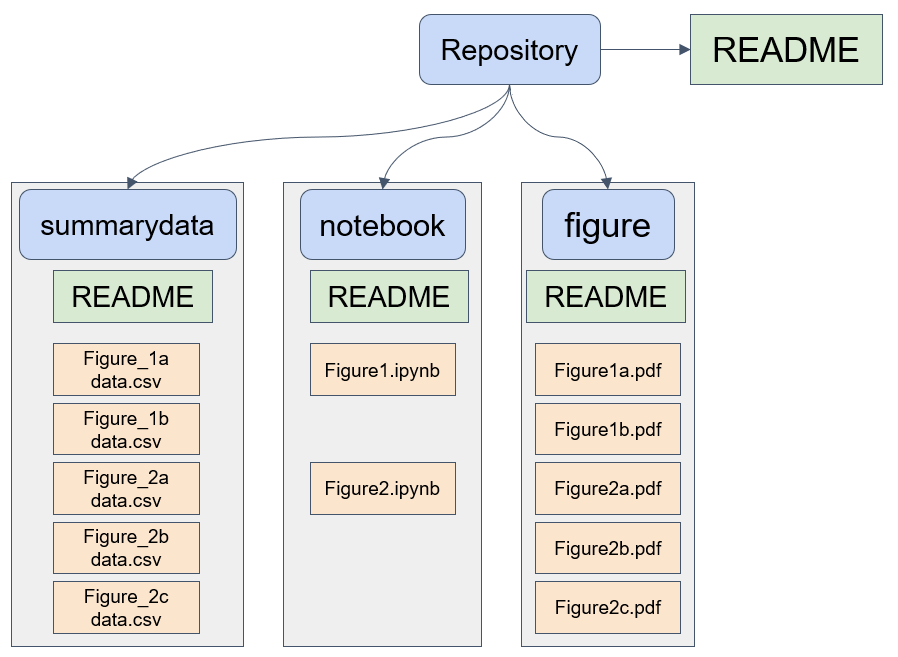

**Question 17.** Describe how sharing your data, code, and figures in this manner increases the transparency and reproducibility of your research.

<font color='red'>Type your answer here.</font> 

To start, reorganize your project directory to be similar to the structure above prior to converting your working directory into a repo. To peform this, you will need to download your copy of the notebook as a `.ipynb` file via File -> Download -> Download .ipynb at the top of this webpage.

Additionally, if you previously deleted your input `.zst` files, remember to re-download them for inclusion in your repository's data directory.

In [ ]:
%%bash
mkdir notebook
mkdir figures
mv *.pdf figures/

Once you have created the above file structure, delete all other files and folders in `/content` and create the README files as shown in the figure above. 

In [ ]:
%%bash
rm *
rm -r Homo_sapiens.GRCh38.cdna.all/
rm -r R/
rm -r quants/
rm -r sample_data/

rm: cannot remove 'data': Is a directory
rm: cannot remove 'figure': Is a directory
rm: cannot remove 'Homo_sapiens.GRCh38.cdna.all': Is a directory
rm: cannot remove 'notebook': Is a directory
rm: cannot remove 'quants': Is a directory
rm: cannot remove 'R': Is a directory
rm: cannot remove 'sample_data': Is a directory


In [ ]:
%%bash
cat > README.md
This is a description of this repository's structure.
- data (Directory): contains compressed RNA-Seq data from bulk peripheral blood mononuclear cells (PBMCs) of both healthy and COVID-19 infected individuals
- notebook (Directory): contains the Jupyter Notebook with the code used to process the input FASTQ files into plots
- figures (Directory): contains graphical representations of the differential expression of genes between COVID-infected and healthy individuals

In [ ]:
%%bash
cat > data/README.md
This is a description of the contents of this subdirectory.
- SRR12007829.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual
- SRR12007837.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual
- SRR12007843.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual

- SRR12007855.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual
- SRR12007857.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual
- SRR12007859.fastq.zst (File): RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual

In [ ]:
%%bash
cat > notebook/README.md
This is a description of the contents of this subdirectory.
- USMFFinalProject_Public.ipynb (File): records the code used to convert the input data in the data directory into the plots in the figure directory

In [ ]:
%%bash
cat > figures/README.md
This is a description of the contents of this subdirectory.
- PCA.pdf (File): a Principal Component Analysis plot comparing overall expression between samples
- clustermap.pdf (File): a hierarchically clustered heatmap displaying the 100 genes that showed the most fold-change in expression
- volcanoPlot.pdf (File): a volcano plot highlighting the most important differentially expressed genes

**Question 18.** What is the purpose of a README file in the parent Repository directory?

<font color='red'>Type your answer here.</font> 

**Question 19.** What is the purpose of the README files in the subdirectories?

<font color='red'>Type your answer here.</font> 

Then, convert your project directory into a Git respoistory and upload it as a **private** GitHub repo using one or more code-blocks below.

In [ ]:
%%bash
cat > .gitignore
.*
.gitignore

In [ ]:
%%bash
git config --global user.email "cynthiaflaire@gmail.com"
git config --global user.name "Cynthia Ronkowski"

In [ ]:
%%bash
git init

Initialized empty Git repository in /content/.git/


In [ ]:
%%bash
ssh-keygen -t ed25519 -C 'cynthiaflaire@gmail.com' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519.
Your public key has been saved in /root/.ssh/id_ed25519.pub.
The key fingerprint is:
SHA256:uMKBjlGaYHv1MUqJDk90BGRe+0XEh7hI1jRXAKIWKB4 cynthiaflaire@gmail.com
The key's randomart image is:
+--[ED25519 256]--+
|  o*o=o+==+.     |
|.E+ *o+o+o .     |
|+oo*o=.o...      |
|o=B.o.+o+        |
|+..+...oS        |
| +.. . .         |
|. . o .          |
|     .           |
|                 |
+----[SHA256]-----+


In [ ]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 31453


Identity added: /root/.ssh/id_ed25519 (cynthiaflaire@gmail.com)


In [ ]:
%%bash
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAII3ESIoSHvt3VEtNjhC6wWO0eSn3ttYmPdJe6d+oTPdL cynthiaflaire@gmail.com


In [ ]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com

Hi CynthiaFlaire! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
%%bash
git add -A
git commit -m "Created the final project repo structure with the appropriate files and directories."

[main 496d6cf] Created the final project repo structure with the appropriate files and directories.
 1 file changed, 4 insertions(+), 4 deletions(-)
 rewrite README.md (79%)


In [ ]:
%%bash
git remote add origin git@github.com:CynthiaFlaire/USMF_Curs-Bioinformatica-2022_FinalProjectExample.git
git branch -M main
git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


fatal: remote origin already exists.
remote: warning: See http://git.io/iEPt8g for more information.        
remote: warning: File data/SRR12007859.fastq.zst is 53.90 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: File data/SRR12007829.fastq.zst is 60.69 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: File data/SRR12007837.fastq.zst is 70.96 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: File data/SRR12007843.fastq.zst is 61.41 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: File data/SRR12007855.fastq.zst is 55.23 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: File data/SRR12007857.fastq.zst is 54.73 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: GH001: Large files detected.

Once completed, follow the instructions outlined here to share your repository with one of our TA's accounts, `CynthiaFlaire`:

https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository

Note we may ask you to share your private repo with additional TAs at a later date.

With that completed, Congratulations! You have finished the entirety of your capstone project!